# An example of using candex with rotated Latitude and Longitude (every grid has it own lat and lon)
## Remapping of CONUS WRF to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

In [1]:
# loading candex
from candex.candex import candex

# initializing candex object
cndx = candex()

# specifying candex needed arguments
cndx.name_of_case             = 'WRF_Medicine_Hat_resample'
cndx.temporary_candex_folder  = '../temporary/' # temporary path that the candex generated GIS files and rempped file will be saved
cndx.name_of_target_shp       = '../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
cndx.name_of_nc_files         = '../data/Source_nc_WRF/WRF*.nc'
cndx.name_of_var_name         = ['T2']
cndx.name_of_var_lon          = 'XLONG'
cndx.name_of_var_lat          = 'XLAT'
cndx.name_of_var_time         = 'time'
cndx.name_of_nc_output_folder = '../output/'
cndx.format_list              = ['f4']
cndx.fill_value_list          = ['-9999.00']

# execute candex
cndx.get_col_row()


no  author name is provide and the author name is changes to (author name)!
candex detects case 2 - rotated lat/lon


SystemExit: The row and column file is saved here: ../temporary/WRF_Medicine_Hat_resample_row_col.csv

/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

lon = np.arange(-118, -110, 0.0625)
lat = np.arange(  48,   52, 0.0625)
lon, lat = np.meshgrid(lon, lat)
lon_mesh_1D = lon.flatten()
lat_mesh_1D = lat.flatten()
ID_mesh_1D  = np.arange(len(lon_mesh_1D))+1
#print(len(ID_mesh_1D))

# load the lat lon from nc file
ds          = xr.open_dataset('../data/Source_nc_WRF/WRF_merged_2000-10-01.nc')
lon_nc      = np.array(ds['XLONG'])
lat_nc      = np.array(ds['XLAT'])
ID_nc       = np.arange(lat_nc.size)+1
ID_nc       = ID_nc.reshape(lat_nc.shape)

## initialize the varibale
lat_source  = np.empty(0)
lon_source  = np.empty(0)
ID_source   = np.empty(0)
W           = np.empty(0)
lat_target  = np.empty(0)
lon_target  = np.empty(0)
ID_target   = np.empty(0)

for i in np.arange(len(lon_mesh_1D)):
    
    #print(i)
    
    D = ((lon_mesh_1D[i]-lon_nc)**2 + (lat_mesh_1D[i]-lat_nc)**2)**0.5
    
    D_inv = 1/D
        
    idx, idy = np.where(D_inv>4)
    
    # get the lengh of idx
    # source lat
    lat_source_temp  =  lat_nc [idx, idy]
    lon_source_temp  =  lon_nc [idx, idy]
    W_temp           =  D_inv  [idx, idy] / sum(D_inv  [idx, idy])
    #print(len(D_inv  [idx, idy]))
    
    #
    ID_source_temp   = ID_nc  [idx, idy]
    lat_target_temp  = np.repeat(lat_mesh_1D[i], len(W_temp))
    lon_target_temp  = np.repeat(lon_mesh_1D[i], len(W_temp))
    ID_target_temp   = np.repeat(ID_mesh_1D[i], len(W_temp))
    
    # 
    lat_source = np.append(lat_source, lat_source_temp)
    lon_source = np.append(lon_source, lon_source_temp)
    ID_source  = np.append(ID_source, ID_source_temp )
    W          = np.append(W, W_temp)
    lat_target = np.append(lat_target, lat_target_temp)
    lon_target = np.append(lon_target, lon_target_temp)
    ID_target  = np.append(ID_target, ID_target_temp)
    

    
df = pd.DataFrame()
df ['ID_s_int']   = ID_source
df ['lat_s_int']  = lat_source
df ['lon_s_int']  = lon_source
df ['ID_t']   = ID_target
df ['lat_t']  = lat_target
df ['lon_t']  = lon_target
df ['weight'] = W

df ['cols'] = np.nan
df ['rows'] = np.nan


#print(df)


df2 = pd.read_csv(cndx.name_of_row_col_file)

for index, row in df2.iterrows():
    
    
    #print(row.lat_s, row.lon_s)
    
    idx_lat = np.where(abs(lat_source-row.lat_s) < 0.0001)
    idx_lon = np.where(abs(lon_source-row.lon_s) < 0.0001)
    
    idx = np.intersect1d (idx_lat, idx_lon)
    
    #print(idx)
    
    if len(idx) > 0:
    
        df.cols.iloc[idx] = row.cols
        df.rows.iloc[idx] = row.rows
    
#     print(df_temp)
#     df_temp = df_temp [df_temp['lon_s_int'] - row.lon_s < 0.0001]
#     print(df_temp)
#     lll

#print(df)

df ['candex_case'] = 2


# df2 = pd.read_csv(cndx.name_of_row_col_file)
# print(df2)

# new_df = pd.merge(df, df2,  how='left', left_on=['lat_s_int','lon_s_int'], right_on = ['lat_s','lon_s'])

# new_df = pd.merge(df, df2,  how='left', left_on=['ID_s_int'], right_on = ['lat_s','lon_s'])

# print(new_df)
    


In [3]:


df.to_csv('../temporary/WRF_Medicine_Hat_resample_remapping_manual.csv')


In [4]:
from candex import candex

cndx = candex() # initialize candex object
cndx.name_of_case             = 'WRF_Medicine_Hat_resample'
cndx.temporary_candex_folder  = '../temporary/' # temporary path that the candex generated GIS files and rempped file will be saved
cndx.name_of_target_shp       = '../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
cndx.name_of_nc_files         = '../data/Source_nc_WRF/WRF*.nc'
cndx.name_of_var_name         = ['T2']
cndx.name_of_var_lon          = 'XLONG'
cndx.name_of_var_lat          = 'XLAT'
cndx.name_of_var_time         = 'time'
cndx.name_of_nc_output_folder = '../output/'
cndx.format_list              = ['f4']
cndx.fill_value_list          = ['-9999.00']
cndx.name_of_remap_file        = '../temporary/WRF_Medicine_Hat_resample_remapping_manual.csv' # if uncommneted candex will use this and skip GIS taskes

# execute candex
cndx.run_candex()



no  author name is provide and the author name is changes to (author name)!
remap file is provided; candex will use this file and skip calculation of remapping
candex case exists in the remap file
candex detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
candex detects that all the varibales have dimensions of:
['time', 'y', 'x']
candex detects that the longitude varibales has dimensions of:
['y', 'x']
candex detects that the latitude varibales has dimensions of:
['y', 'x']
Remapping ../data/Source_nc_WRF/WRF_merged_2000-10-01.nc to ../output/WRF_Medicine_Hat_resample_remapped_2000-10-01-00-00-00.nc
Started at date and time 2021-02-17 20:35:07.490283
Ended   at date and time 2021-02-17 20:35:08.168108


--------------
--------------
# Visualization of the source and the results

<xarray.Dataset>
Dimensions:      (time: 24, x: 199, y: 168)
Coordinates:
  * time         (time) datetime64[ns] 2000-10-01 ... 2000-10-01T23:00:00
    XLONG        (y, x) float64 ...
    XLAT         (y, x) float64 ...
Dimensions without coordinates: x, y
Data variables:
    I_RAINNC     (time, y, x) float64 ...
    LWDNB        (time, y, x) float32 ...
    P            (time, y, x) float32 ...
    PREC_ACC_C   (time, y, x) float32 ...
    PREC_ACC_NC  (time, y, x) float32 ...
    Q2           (time, y, x) float32 ...
    RAINC        (time, y, x) float32 ...
    RAINNC       (time, y, x) float32 ...
    SWDNB        (time, y, x) float32 ...
    T2           (time, y, x) float32 ...
    U10          (time, y, x) float32 ...
    V10          (time, y, x) float32 ...
(33432,)
<xarray.Dataset>
Dimensions:    (ID: 8192, time: 24)
Coordinates:
  * time       (time) datetime64[ns] 2000-10-01 ... 2000-10-01T23:00:00
  * ID         (ID) float64 1.0 2.0 3.0 4.0 ... 8.19e+03 8.191e+03 8.192e+03

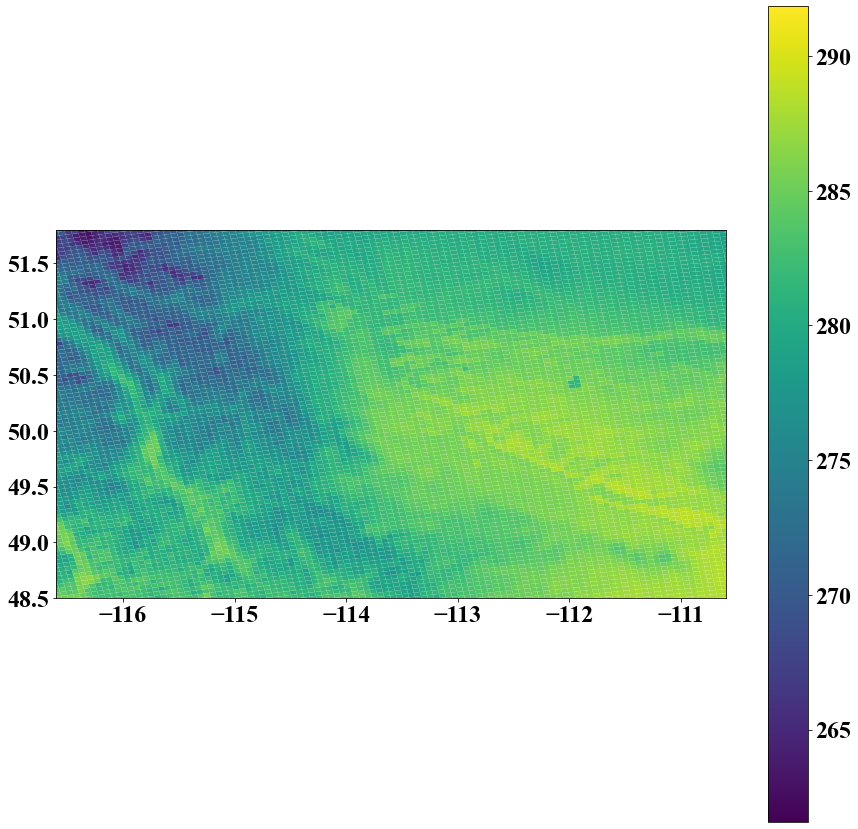

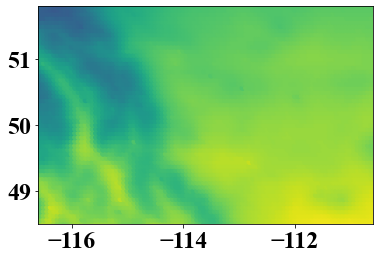

In [5]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)



# visualize the original netCDF for the first file, first time step
shp_source = gpd.read_file('../temporary/WRF_Medicine_Hat_source_shapefile.shp') # load the target shapefile
# load the infromation on the
nc_names = sorted(glob.glob ('../data/Source_nc_WRF/WRF*.nc'))
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
print(ds)
T2       = np.array(ds.T2 [3,:,:]).flatten() # the first time frame of the first 
print(T2.shape)
lat      = np.array(ds.XLAT).flatten()  # the first time frame of the first 
lon      = np.array(ds.XLONG).flatten()  # the first time frame of the first 

lat_shp = shp_source ['lat_s']
lon_shp = shp_source ['lon_s']
idx = np.zeros(len(lat_shp))
value = np.zeros(len(lat_shp))

for i in np.arange(len(lat_shp)):
    # find the row of the shapefile that is closes to the point
    diff = abs(lat-lat_shp[i])+ abs(lon-lon_shp[i])
    temp = np.where(diff == np.min(diff))
    idx[i] = temp[0].astype(int)
    a = idx[i]
    value[i] = T2 [a.astype(int)]


shp_source ['value'] = value

max_T2 = max(value)
min_T2 = min(value)


f, axes = plt.subplots(1,1,figsize=(15,15))
shp_source.plot(column='value', ax = axes, legend=True)
plt.xlim([-116.6 , -110.6 ])
plt.ylim([48.5 , 51.8 ])


# 

f, axes = plt.subplots(1,1 )
plt.xlim([-116.6 , -110.6 ])
plt.ylim([48.5 , 51.8 ])

ds = xr.open_dataset('../output/WRF_Medicine_Hat_resample_remapped_2000-10-01-00-00-00.nc')
print(ds)

lat = ds.latitude
lon = ds.longitude
T2  = ds.T2.isel(time=23) # the last time step

plt.scatter(lon, lat, s=25, c=np.array(T2), vmin=min_T2, vmax=max_T2)


